<b><font size="6">|Time Series|Sales Forecasting</font></b>

* **Author**: Dean
* **Student ID**: 600367
* **Date:**: 23-June-2025

<b><font size="5">Instructions</font></b>

Carefully read and follow these instructions:

- Enter your personal details in the cell above.
- All practical work must be uploaded to `BC Connect` on the completion of the test/examination, using the following file name convention:
  - **`06.CAS.002_Surname_Firstname_StudentID.ipynb`**. 
  - You **MUST** replace **Surname** with your surname
  - You **MUST** replace **Firstname** with your firstname
  - You **MUST** replace **StudentID** with your student id.
- You must submit this `.ipynb` with the above file name format.
- **Only** submit the single notebook file. No zip files will be accepted.
- Submit on *BC Connect* before the indicated time expires.
- Ensure that **all** cells run before submitting.
- Use the IPython command **display()** (and *not* **print()**) when required to display dataframes.
- The **marks** cells contain the allocated marks for each section. (**DO NOT DELETE OR EDIT THEM!**)

**You must add/insert the necessary code cell after the instruction block with your code.**

<b><font size="5">Problem Formulation</font></b>

You are provided with a time series dataset that contains monthly cafe' sales data from Australia (in billions AUD) from **April 1982** onwards.

The dataset is provided in the attached csv file: **auscafe_simulated.csv**.

You are required to build a time series model and generate a forecast for the next 48 months, based on the instructions and requirements below.


In [15]:
marks = 0

# Import Libraries

<div class="alert alert-danger alertdanger" style="margin-top: 10px">
<p>Import all required libraries <b>[1 marks]</b></p>

Marks will be deducted for unnecessary libraries.   
    
<b>Insert your code cell after this.</b>
</div>

In [16]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# from statsmodels.tsa.stattools import adfuller

from statsmodels.tsa.seasonal import seasonal_decompose

In [17]:
marks += 1

# Load and Plot the Data

<div class="alert alert-danger alertdanger" style="margin-top: 10px">
<p>Load the dataset and plot the time series.</p>
    
<b>Insert your code cell after this.</b> 
</div>

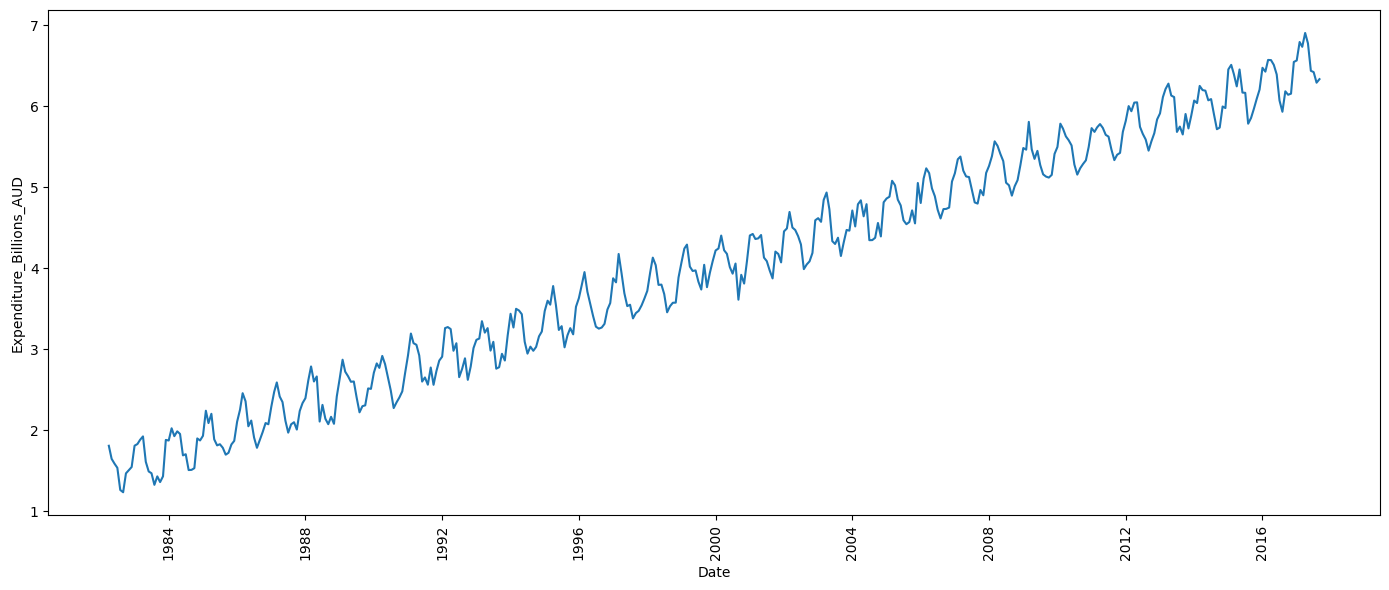

In [18]:
df = pd.read_csv(r"./auscafe_simulated.csv")
# display(df.head())

df['Date'] = pd.to_datetime(df['Date'], format='mixed')
df.set_index('Date', inplace=True)

# Plot original data
plt.figure(figsize=(14, 6))
sns.lineplot(data=df, x='Date', y='Expenditure_Billions_AUD')
# plt.title("Monthly Gold Prices")
# plt.ylabel("Price (USD)")
# plt.xlabel("Date")
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()



# result = adfuller(df['IPG2211A2N'])
# print(f"ADF Statistic: {np.round(result[0])}")
# print(f"p-value: {np.round(result[1])}")

In [19]:
marks += 3

## Time Series Decomposition

<div class="alert alert-danger alertdanger" style="margin-top: 20px">
<p>Decompose and plot the time series components.</p>
    
<b>Insert your code cell after this.</b>     
</div>

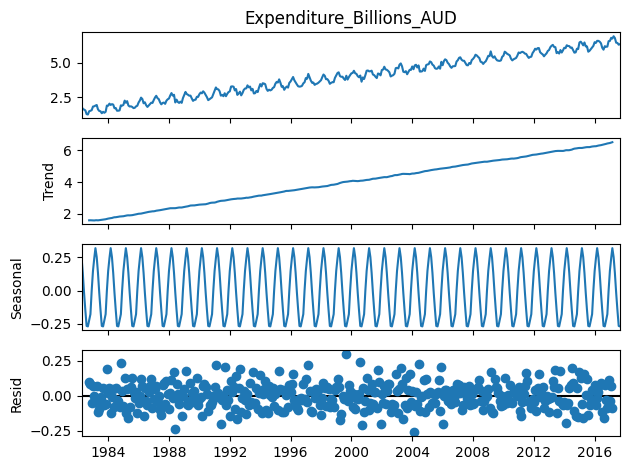

In [20]:
decomp = seasonal_decompose(df['Expenditure_Billions_AUD'], model='additive', period=12)
decomp.plot()
plt.show()

In [21]:
marks += 3

## Stationarity check

<div class="alert alert-danger alertdanger" style="margin-top: 1px">
<p>Check for stationarity using the Augmented Dickey-Fuller test (ADF) and print the results.</p> 
<b>Insert your code cell after this.</b>
</div>

In [30]:
from statsmodels.tsa.arima.model import ARIMA
df.index = pd.date_range(start=df.index[0], periods=len(df), freq='MS')

# Fit ARIMA model (p=5, d=1, q=2)
model = ARIMA(df['Expenditure_Billions_AUD'], order=(5, 1, 2))
model_fit = model.fit()

# Summary
print(model_fit.summary())

c:\Users\600367\Desktop\MLG382\.venv\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
c:\Users\600367\Desktop\MLG382\.venv\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'


                                  SARIMAX Results                                   
Dep. Variable:     Expenditure_Billions_AUD   No. Observations:                  426
Model:                       ARIMA(5, 1, 2)   Log Likelihood                 290.588
Date:                      Mon, 23 Jun 2025   AIC                           -565.177
Time:                              10:21:11   BIC                           -532.760
Sample:                          04-01-1982   HQIC                          -552.370
                               - 09-01-2017                                         
Covariance Type:                        opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.9018      0.074     12.124      0.000       0.756       1.048
ar.L2         -0.0619      0.076     -0.817      0.414      -0.210       0.087
ar.L

c:\Users\600367\Desktop\MLG382\.venv\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


In [22]:
marks += 3

<div class="alert alert-danger alertdanger" style="margin-top: 1px">
<p>Difference the series (<b>if needed</b>) and recheck (ADF) and print the results.</p> 
<b>Insert your code cell after this.</b>
</div>

In [23]:
marks += 3

<div class="alert alert-danger alertdanger" style="margin-top: 1px">
<p>Interpret the ADF test results before and after differencing. Was differencing necessary</p>
    
<b>Insert your markdown cell with your answer after this.</b>    
</div>

In [24]:
marks += 3

## Autocorrelation Function (ACF) and Partial Autocorrelation Function (PACF)

<div class="alert alert-danger alertdanger" style="margin-top: 1px">
<p>Plot the ACF and PACF.</p>

<b>Insert your code cell after this.</b>
</div>

In [25]:
marks += 3

# Model

<div class="alert alert-danger alertdanger" style="margin-top: 1px">
<p> Based on your ACF and PACF plots choose a suitable choice of <b>p</b> and <b>q</b> and fit an ARIMA model.
    
<b>Insert your code cell after this.</b>    
</div>

In [31]:
from statsmodels.tsa.arima.model import ARIMA
df.index = pd.date_range(start=df.index[0], periods=len(df), freq='MS')

# Fit ARIMA model (p=5, d=1, q=2)
model = ARIMA(df['Expenditure_Billions_AUD'], order=(5, 1, 2))
model_fit = model.fit()

# Summary
print(model_fit.summary())

c:\Users\600367\Desktop\MLG382\.venv\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
c:\Users\600367\Desktop\MLG382\.venv\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'
c:\Users\600367\Desktop\MLG382\.venv\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


                                  SARIMAX Results                                   
Dep. Variable:     Expenditure_Billions_AUD   No. Observations:                  426
Model:                       ARIMA(5, 1, 2)   Log Likelihood                 290.588
Date:                      Mon, 23 Jun 2025   AIC                           -565.177
Time:                              10:23:21   BIC                           -532.760
Sample:                          04-01-1982   HQIC                          -552.370
                               - 09-01-2017                                         
Covariance Type:                        opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.9018      0.074     12.124      0.000       0.756       1.048
ar.L2         -0.0619      0.076     -0.817      0.414      -0.210       0.087
ar.L

In [26]:
marks += 5

## Model Evaluation

<div class="alert alert-danger alertdanger" style="margin-top: 1px">
<p>Plot and comment on the residuals</p>
    
<b>Insert your code cell after this.</b>
</div>

In [27]:
marks += 3

# Forecasting

<div class="alert alert-danger alertdanger" style="margin-top: 1px">
<p>Forecast the cafe sales for the next 48 months, and comment on the forecast.</p>
    
<b>Insert your code cell after this.</b>
</div>

In [32]:
n_periods = 48
forecast = model_fit.forecast(steps=n_periods)

# Generate new monthly dates
last_date = df.index[-1]
future_dates = pd.date_range(start=last_date + pd.DateOffset(months=1), periods=n_periods, freq='MS')

# Create forecast DataFrame
forecast_df = pd.DataFrame({
    'Date': future_dates,
    'Forecast': forecast
}).set_index('Date')

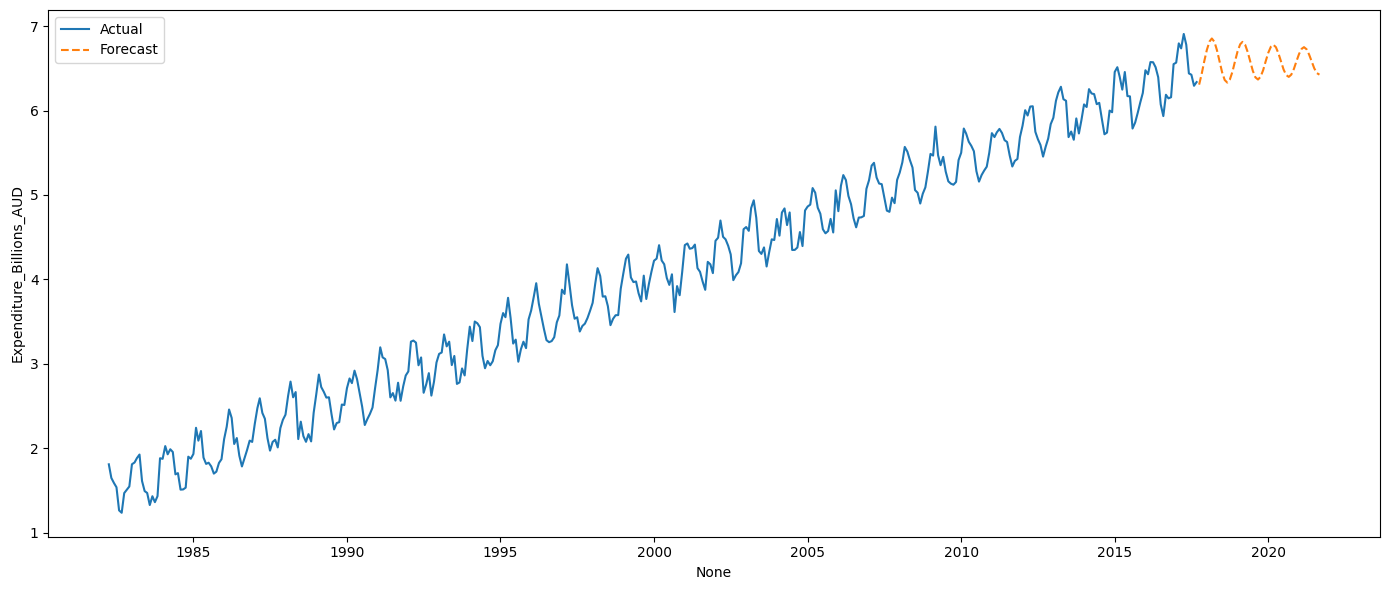

In [33]:
plt.figure(figsize=(14, 6))
sns.lineplot(data=df, x=df.index, y='Expenditure_Billions_AUD', label='Actual')
sns.lineplot(data=forecast_df, x=forecast_df.index, y='Forecast', label='Forecast', linestyle='--')
plt.legend()
plt.tight_layout()
plt.show()

In [28]:
marks += 3

## 

<b><font size="5">Total Marks:</font></b>

In [29]:
print(f"Total Marks = {marks} / 30")

Total Marks = 30 / 30
